# Train with rect_model


### fetch dataset

In [1]:
import os

# Specify the folder name
folder_name = '/content/dataset'

# Create the folder
os.makedirs(folder_name, exist_ok=True)

%cd /content/dataset
# Fetch and unzip the dataset directly into the new folder
!curl -L "https://app.roboflow.com/ds/8jHx9pgWpA?key=Lj2tnt8R5B" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

# Optional: Clear the output
from IPython.display import clear_output
clear_output()

print("Dataset successfully downloaded and placed in '/content/dataset'.")

Dataset successfully downloaded and placed in '/content/dataset'.


### train the model

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 905.3/905.3 kB 31.4 MB/s eta 0:00:00


In [3]:
from ultralytics import YOLO

# Load the YOLO model (YOLOv8 small model)
model = YOLO("yolov8s.pt")

# Train the model
model.train(data='/content/dataset/data.yaml', epochs=10, imgsz=640, batch=16)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 21.5M/21.5M [00:00<00:00, 302MB/s]


Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/dataset/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes

100%|██████████| 755k/755k [00:00<00:00, 22.5MB/s]


Overriding model.yaml nc=80 with nc=83

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 107MB/s]


AMP: checks passed ✅


train: Scanning /content/dataset/train/labels... 117 images, 0 backgrounds, 0 corrupt: 100%|██████████| 117/117 [00:00<00:00, 878.30it/s]

train: New cache created: /content/dataset/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 323, len(boxes) = 624. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.24 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/dataset/valid/labels... 41 images, 0 backgrounds, 0 corrupt: 100%|██████████| 41/41 [00:00<00:00, 942.94it/s]

val: New cache created: /content/dataset/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000115, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10       4.1G      1.188      7.029      1.383         31        640: 100%|██████████| 8/8 [00:05<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.07it/s]

                   all         41        327      0.103      0.157     0.0178     0.0125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      4.11G      1.221      6.213      1.392         35        640: 100%|██████████| 8/8 [00:02<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]


                   all         41        327      0.138      0.106     0.0184     0.0123

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      3.98G      1.106      5.056       1.32         32        640: 100%|██████████| 8/8 [00:02<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.71it/s]

                   all         41        327     0.0629       0.16     0.0175     0.0124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      4.04G      1.062      4.586      1.265         31        640: 100%|██████████| 8/8 [00:03<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]


                   all         41        327     0.0475      0.133     0.0232     0.0164

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      3.98G      1.064      3.975       1.28         32        640: 100%|██████████| 8/8 [00:02<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]


                   all         41        327     0.0151      0.174     0.0251     0.0177

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      4.01G      1.026      3.558      1.275         37        640: 100%|██████████| 8/8 [00:02<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.65it/s]


                   all         41        327     0.0198      0.184     0.0281     0.0181

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      4.22G      1.011      3.227      1.266         36        640: 100%|██████████| 8/8 [00:02<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.26it/s]

                   all         41        327     0.0177      0.178     0.0352     0.0248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      4.19G     0.9628      3.102      1.214         20        640: 100%|██████████| 8/8 [00:02<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]

                   all         41        327     0.0176      0.194     0.0381     0.0271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      4.04G     0.9644       3.09       1.21         31        640: 100%|██████████| 8/8 [00:02<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]

                   all         41        327     0.0186      0.198     0.0408     0.0294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      4.14G      0.978      3.026      1.204         25        640: 100%|██████████| 8/8 [00:02<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.97it/s]


                   all         41        327     0.0178      0.206     0.0423     0.0308

10 epochs completed in 0.015 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.6MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.6MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,157,705 parameters, 0 gradients, 28.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.85it/s]


                   all         41        327     0.0176      0.203     0.0423     0.0308
                 apple          1          1     0.0101          1     0.0995     0.0697
              backpack          2          4          0          0          0          0
                banana          2          2          0          0          0          0
                   bed          5          6          0          0          0          0
                 bench          1          1          0          0          0          0
               bicycle          2          3          0          0          0          0
                  book          3         28          0          0          0          0
                bottle          2          4          0          0          0          0
                  bowl          3          8     0.0492      0.375     0.0511      0.042
              broccoli          2          5          0          0          0          0
                   bu

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 4,  5,  6,  9, 10, 11, 14, 15, 16, 17, 18, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 36, 37, 38, 39, 41, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 56, 57, 58, 60, 61, 62, 64, 65, 67, 68, 70, 72, 74, 75, 77, 78, 79, 80, 81])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78cca177ae30>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032

# Predict

### Predict with original model

In [10]:
from ultralytics import YOLO

# Load the YOLO model
# model = YOLO("yolov8n.pt")  # Replace with your model path
model = YOLO("/content/dataset/runs/detect/train/weights/best.pt")

# Specify the image path
img_path = "/content/Annotation 2025-01-03 152531.png"  # Replace with your downloaded image path

# Run inference on the image
results = model(img_path, conf=0.25)  # Set confidence threshold to 0.25

# Access the first result (YOLO might return a list of results)
result = results[0]  # Assuming there is only one image, otherwise handle each result

# Show the results (this will display the image with bounding boxes)
result.show()  # Display the image with the detection results

# Optionally, save the results to a file
result.save()  # Saves the results (annotated image) to disk


FileNotFoundError: [Errno 2] No such file or directory: '/content/dataset/runs/detect/train/weights/best.pt'

### Predict with Trained model

#### Object detection


image 1/1 /content/example_01.jpg: 416x640 4 circles, 1 rectangle, 2 squares, 13.5ms
Speed: 2.7ms preprocess, 13.5ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 640)


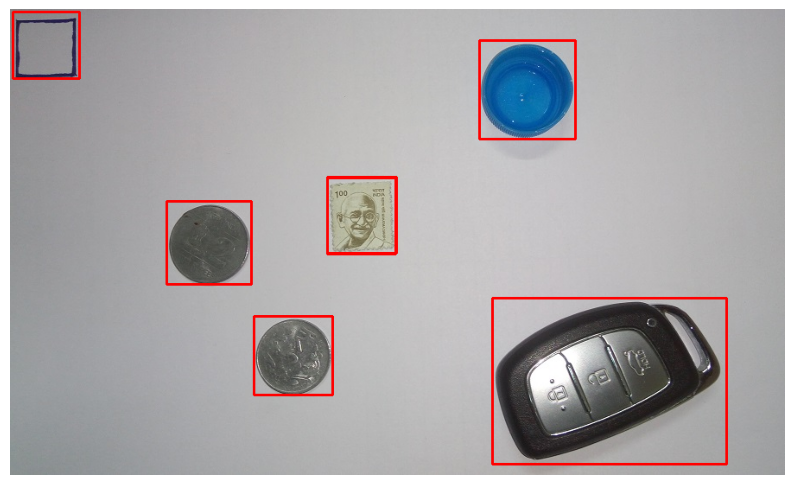

Annotated image saved to /content/annotated_tight_example_01.jpg


In [19]:
from ultralytics import YOLO
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the YOLOv8 model
# model = YOLO("/content/dataset/runs/detect/train2/weights/best.pt")  # Replace with your model path
model = YOLO("/content/best (2).pt")

# Specify the image path
img_path = "/content/example_01.jpg"  # Replace with your image path

# Run inference on the image
results = model(img_path, conf=0.25)  # Set confidence threshold to 0.25

# Access the first result (YOLOv8 might return a list of results)
result = results[0]  # Assuming there is only one image, otherwise handle each result

# Extract bounding boxes (xyxy format)
boxes = result.boxes.xyxy.cpu().numpy()  # Bounding box coordinates (xyxy)
confidences = result.boxes.conf.cpu().numpy()  # Confidence scores

# Filter out low-confidence predictions (confidence threshold: 0.25)
boxes = boxes[confidences > 0.25]

# Read the original image to draw bounding boxes
image = cv2.imread(img_path)

# Check if segmentation masks are available
masks = result.masks  # Segmentation masks (if available)

if masks is not None:
    # Draw tight bounding boxes using the masks
    for mask in masks:
        # Get the mask as a binary image
        mask_image = mask.numpy().astype(np.uint8) * 255

        # Find contours to get the tightest bounding box around the mask
        contours, _ = cv2.findContours(mask_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        for contour in contours:
            # Get the tight bounding box around the object (using contours)
            x, y, w, h = cv2.boundingRect(contour)

            # Draw the bounding box on the image
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
else:
    # If no masks, just use the standard bounding boxes
    for box in boxes:
        x1, y1, x2, y2 = map(int, box)  # Convert to integers for drawing
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Show the result image with bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
plt.axis('off')  # Hide axis
plt.show()

# Optionally, save the results to a file
output_img_path = "/content/annotated_tight_example_01.jpg"
cv2.imwrite(output_img_path, image)  # Save the image with bounding boxes

print(f"Annotated image saved to {output_img_path}")


#### object with dimention prediction


image 1/1 /content/example_01.jpg: 416x640 4 circles, 1 rectangle, 2 squares, 13.7ms
Speed: 2.9ms preprocess, 13.7ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 640)


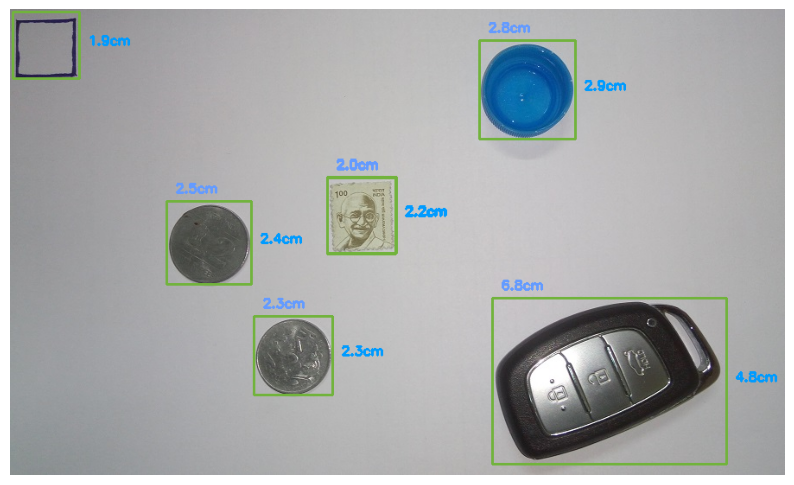

Annotated image saved to /content/annotated_example_01.jpg


In [20]:
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt

# Load the YOLO model
# model = YOLO("/content/dataset/runs/detect/train2/weights/best.pt")  # Replace with your model path
model = YOLO("/content/best (2).pt")

# Specify the image path
img_path = "/content/example_01.jpg"  # Replace with your image path
# img_path = "/content/example2.png"  # Replace with your image path


# Run inference on the image with adjusted thresholds
results = model(img_path, conf=0.25, iou=0.6)  # Adjusted confidence and IOU thresholds

# Access the first result and extract bounding boxes and confidence scores
result = results[0]
boxes = result.boxes.xyxy.cpu().numpy()  # Bounding box coordinates
confidences = result.boxes.conf.cpu().numpy()  # Confidence scores

# Filter bounding boxes based on confidence threshold
boxes = boxes[confidences > 0.25]

# Load the original image
image = cv2.imread(img_path)

# Reference values for pixel-to-cm conversion
ref_width_pixels = 100  # Example reference width in pixels
dist_in_cm = 2.5  # Reference object size in cm
pixel_per_cm = ref_width_pixels / dist_in_cm

# Draw bounding boxes and annotate dimensions
for box in boxes:
    x1, y1, x2, y2 = map(int, box)
    cv2.rectangle(image, (x1, y1), (x2, y2), (60, 179, 113), 2)  # Draw bounding box

    # Calculate dimensions in real-world units (cm)
    real_width = (x2 - x1) / pixel_per_cm
    real_height = (y2 - y1) / pixel_per_cm

    # Annotate dimensions on the image
    cv2.putText(image, f"{real_width:.1f}cm", (x1 + 10, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 155, 100), 2)
    cv2.putText(image, f"{real_height:.1f}cm", (x2 + 10, y1 + (y2 - y1) // 2), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 155, 0), 2)

# Display the annotated image
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Save the annotated image
output_img_path = "/content/annotated_example_01.jpg"
cv2.imwrite(output_img_path, image)
print(f"Annotated image saved to {output_img_path}")


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving example_01.jpg to example_01.jpg


# Download and save model

In [ ]:
from google.colab import files
files.download('/content/dataset/runs/detect/train/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>